# Project Phase 2/3
## Joseph Princiotta & Justin Lusk

#### Below is relevant code from Phase 0/1. This must be executed for the remaning code to compile properly.

In [1]:
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


dfTest = pd.read_csv("Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'])
dfTrain = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'])
################################# Phase 0 and 1 ####################################################
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
dfTrain.drop(rowsToDrop, inplace=True)
imputer = KNNImputer(n_neighbors=10)
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumDash']>20].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
outlier_label=clf.fit_predict(X)
rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
dfTrain2Numerical.is_copy = False
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X


/var/folders/_4/hwjprh3j6wl6k6dfccg50w0c0000gn/T/ipykernel_8236/3322510146.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
/var/folders/_4/hwjprh3j6wl6k6dfccg50w0c0000gn/T/ipykernel_8236/3322510146.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

## Begin Phase 2/3 

Boxplot of dataframe shows that dfTrain2std numerical features are standardized.
The dfTrain2std now contains all numerical features, standardized. 

<AxesSubplot:>

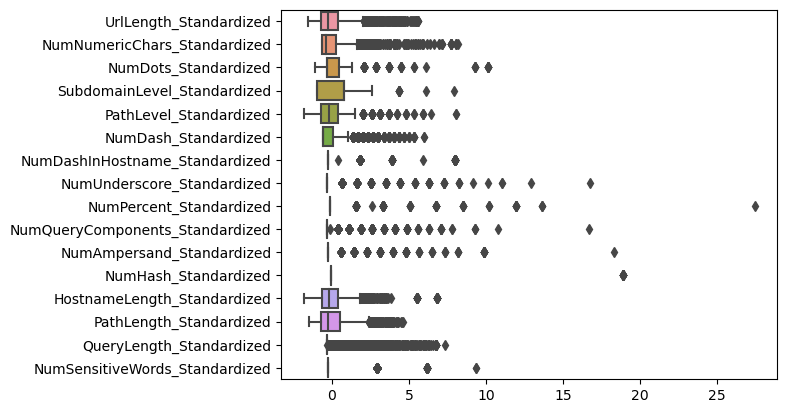

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])

# Create dataframe of standardized numerical features
dfTrain2Numstd= dfTrain2Numerical[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]
sns.boxplot(data=dfTrain2Numstd,orient='h')

Create a dataframe of numerical features and perform standardization.
Then create seperate feature columns lists. One for numeric features and one for binary features. This is to make visualizing correlations easier in the next section. 


In [3]:
# Created dataframe of all binary data, now binary and standardized numerical features can be seperated IF NEEDED.
dfTrain2Bin= dfTrain2[['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]
# dfTrain2Bin contains binary features and dfTrain2Numstd contains standardized numerical data. 

# Create main dataframe that contains standardized numerical data and binary data
dfTrain3=dfTrain2Bin.join(dfTrain2Numstd)
# Create list of all features
featurecols=dfTrain3.columns.to_list()
print(featurecols)

# Create seperate lists for numerical & binary features lists
NUMfeaturecols=dfTrain2Numstd.columns.to_list()
BINfeaturecols=dfTrain2Bin.columns.to_list()

####### Dataframe list: ######
# 'dfTrain3' = Main dataframe of training data, std numerical and binary data 
# 'featurecols' = list of all feature cols in 'dfTrain3'
# 'NUMfeaturecols' = list of all numerical features 
# 'BINfeaturecols' = list of all binary features
# 'dfTrain2Bin' = all binary features 
# 'dfTrain2Numstd' = all numerical features standardized

['AtSymbol', 'TildeSymbol', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'DoubleSlashInPath', 'EmbeddedBrandName', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'RightClickDisabled', 'PopUpWindow', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'UrlLength_Standardized', 'NumNumericChars_Standardized', 'NumDots_Standardized', 'SubdomainLevel_Standardized', 'PathLevel_Standardized', 'NumDash_Standardized', 'NumDashInHostname_Standardized', 'NumUnderscore_Standardized', 'NumPercent_Standardized', 'NumQueryComponents_Standardized', 'NumAmpersand_Standardized', 'NumHash_Standardized', 'HostnameLength_Standardized', 'PathLength_Standardized', 'QueryLength_Standardized', 'NumSensitiveWords_Standardized']


### Identify features that are correlated

Need to investigate which features are highly correlated. This way they can be removed from the model. Failing to remove tightly correlated features could cause the model to overfit. 

First, add 'CLASS_LABEL' to main training dataframe 'dfTrain3'
Then, create a heatmap showing correlation between all features. This is a lot of data for one heatmap.

<AxesSubplot:>

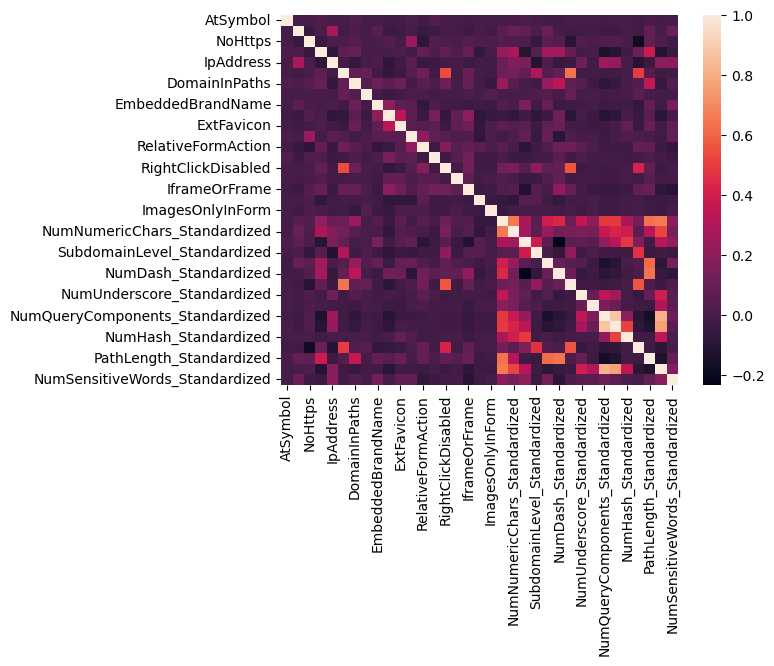

In [4]:
# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])

# Add 'dfClass_labels' to main dfTrain3 
dfTrain3 = dfTrain3.join(dfClass_labels)

corr=dfTrain3[featurecols].corr()
sns.heatmap(corr)

#### Seperate the correlating by data type. First, show heatmap of numerical features.

<AxesSubplot:>

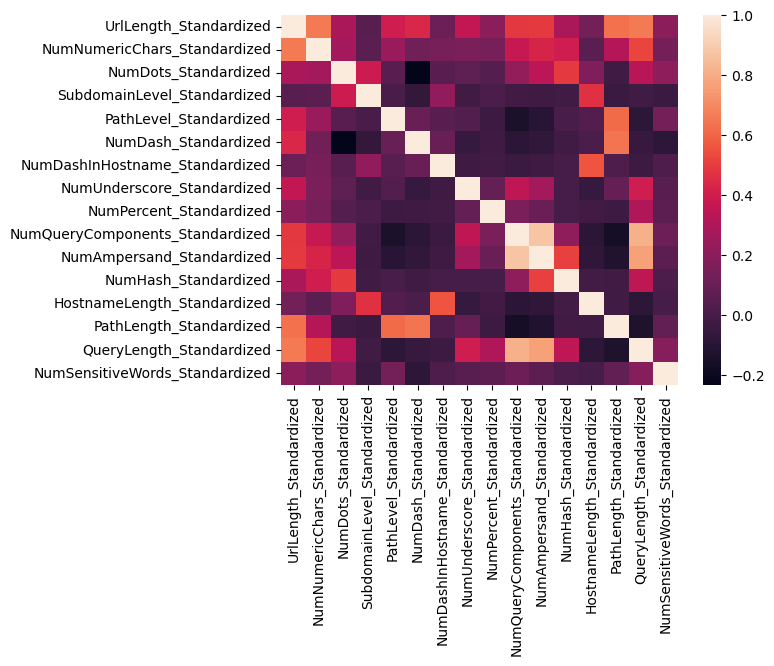

In [5]:
corr=dfTrain3[NUMfeaturecols].corr()
sns.heatmap(corr)

The lighter shades in the map show correlations. 'UrLength' and 'QueryLength' are correlated. Also 'NumNumericChars' & 'UrLength'. Also high correlation between 'QueryLength' & 'NumQueryComponents'. These features should not be included together in the same model as it will create overfitting. Overfitting can cause the model to fit more data then necessary, causing the model to make incorrect predictions on new datasets. 

Next, list which numerical features have the greatest correlation:

In [6]:
bestNum= corr.mean()
bestNum= bestNum.sort_values(ascending=False)
print(bestNum)

UrlLength_Standardized             0.397090
NumNumericChars_Standardized       0.311978
QueryLength_Standardized           0.305926
NumAmpersand_Standardized          0.274856
NumQueryComponents_Standardized    0.251586
NumDots_Standardized               0.227384
NumHash_Standardized               0.197061
PathLength_Standardized            0.176893
NumUnderscore_Standardized         0.167599
PathLevel_Standardized             0.142832
NumSensitiveWords_Standardized     0.132481
NumDashInHostname_Standardized     0.131554
HostnameLength_Standardized        0.128380
NumPercent_Standardized            0.121453
SubdomainLevel_Standardized        0.121015
NumDash_Standardized               0.105588
dtype: float64


The heatmap & list shows which numerical features would be best to keep for the model:
    
    'UrlLength_Standardized' is highly correlated with the other features, this should be in the model
    'QueryLength_Standardized' is highly correlated with the other features, however it is hightly correlated with 'UrlLength_Standardized' and can be excluded.
    'NumNumericChars' is highly correlated 'UrlLength_Standardized' and can be excluded from the model.

#### Heatmap of binary features

<AxesSubplot:>

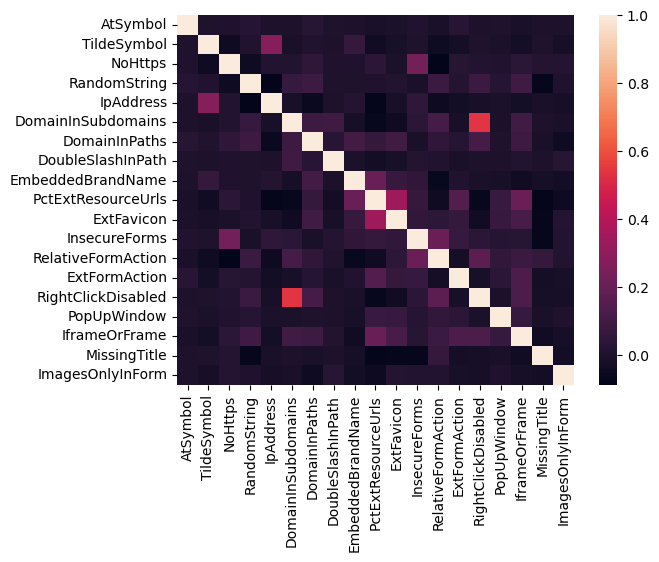

In [7]:
corr=dfTrain3[BINfeaturecols].corr()
sns.heatmap(corr)

This heatmap is very different, it shows very little correlation between the binary features. 'DomainInSubdomains' & 'RightClickDisabled' show a higher correlation then the rest of the features and should not be included together in the model.

### Relationship between target and numeric features
Begin by plotting relations of all numerical features to the target 'CLASS_LABEL'. This plot shows too much at one time and should be plotted in parts. Seaborn pairplot works best with numerical data, so this plot will only include 'dfTrain2Numstd' dataframe to exclude binary features. 

Features that have non-linear relationships depending on 'CLASS_LABEL' should be included in model because they have influence on the target.

#### Show realationship between numerical features and target

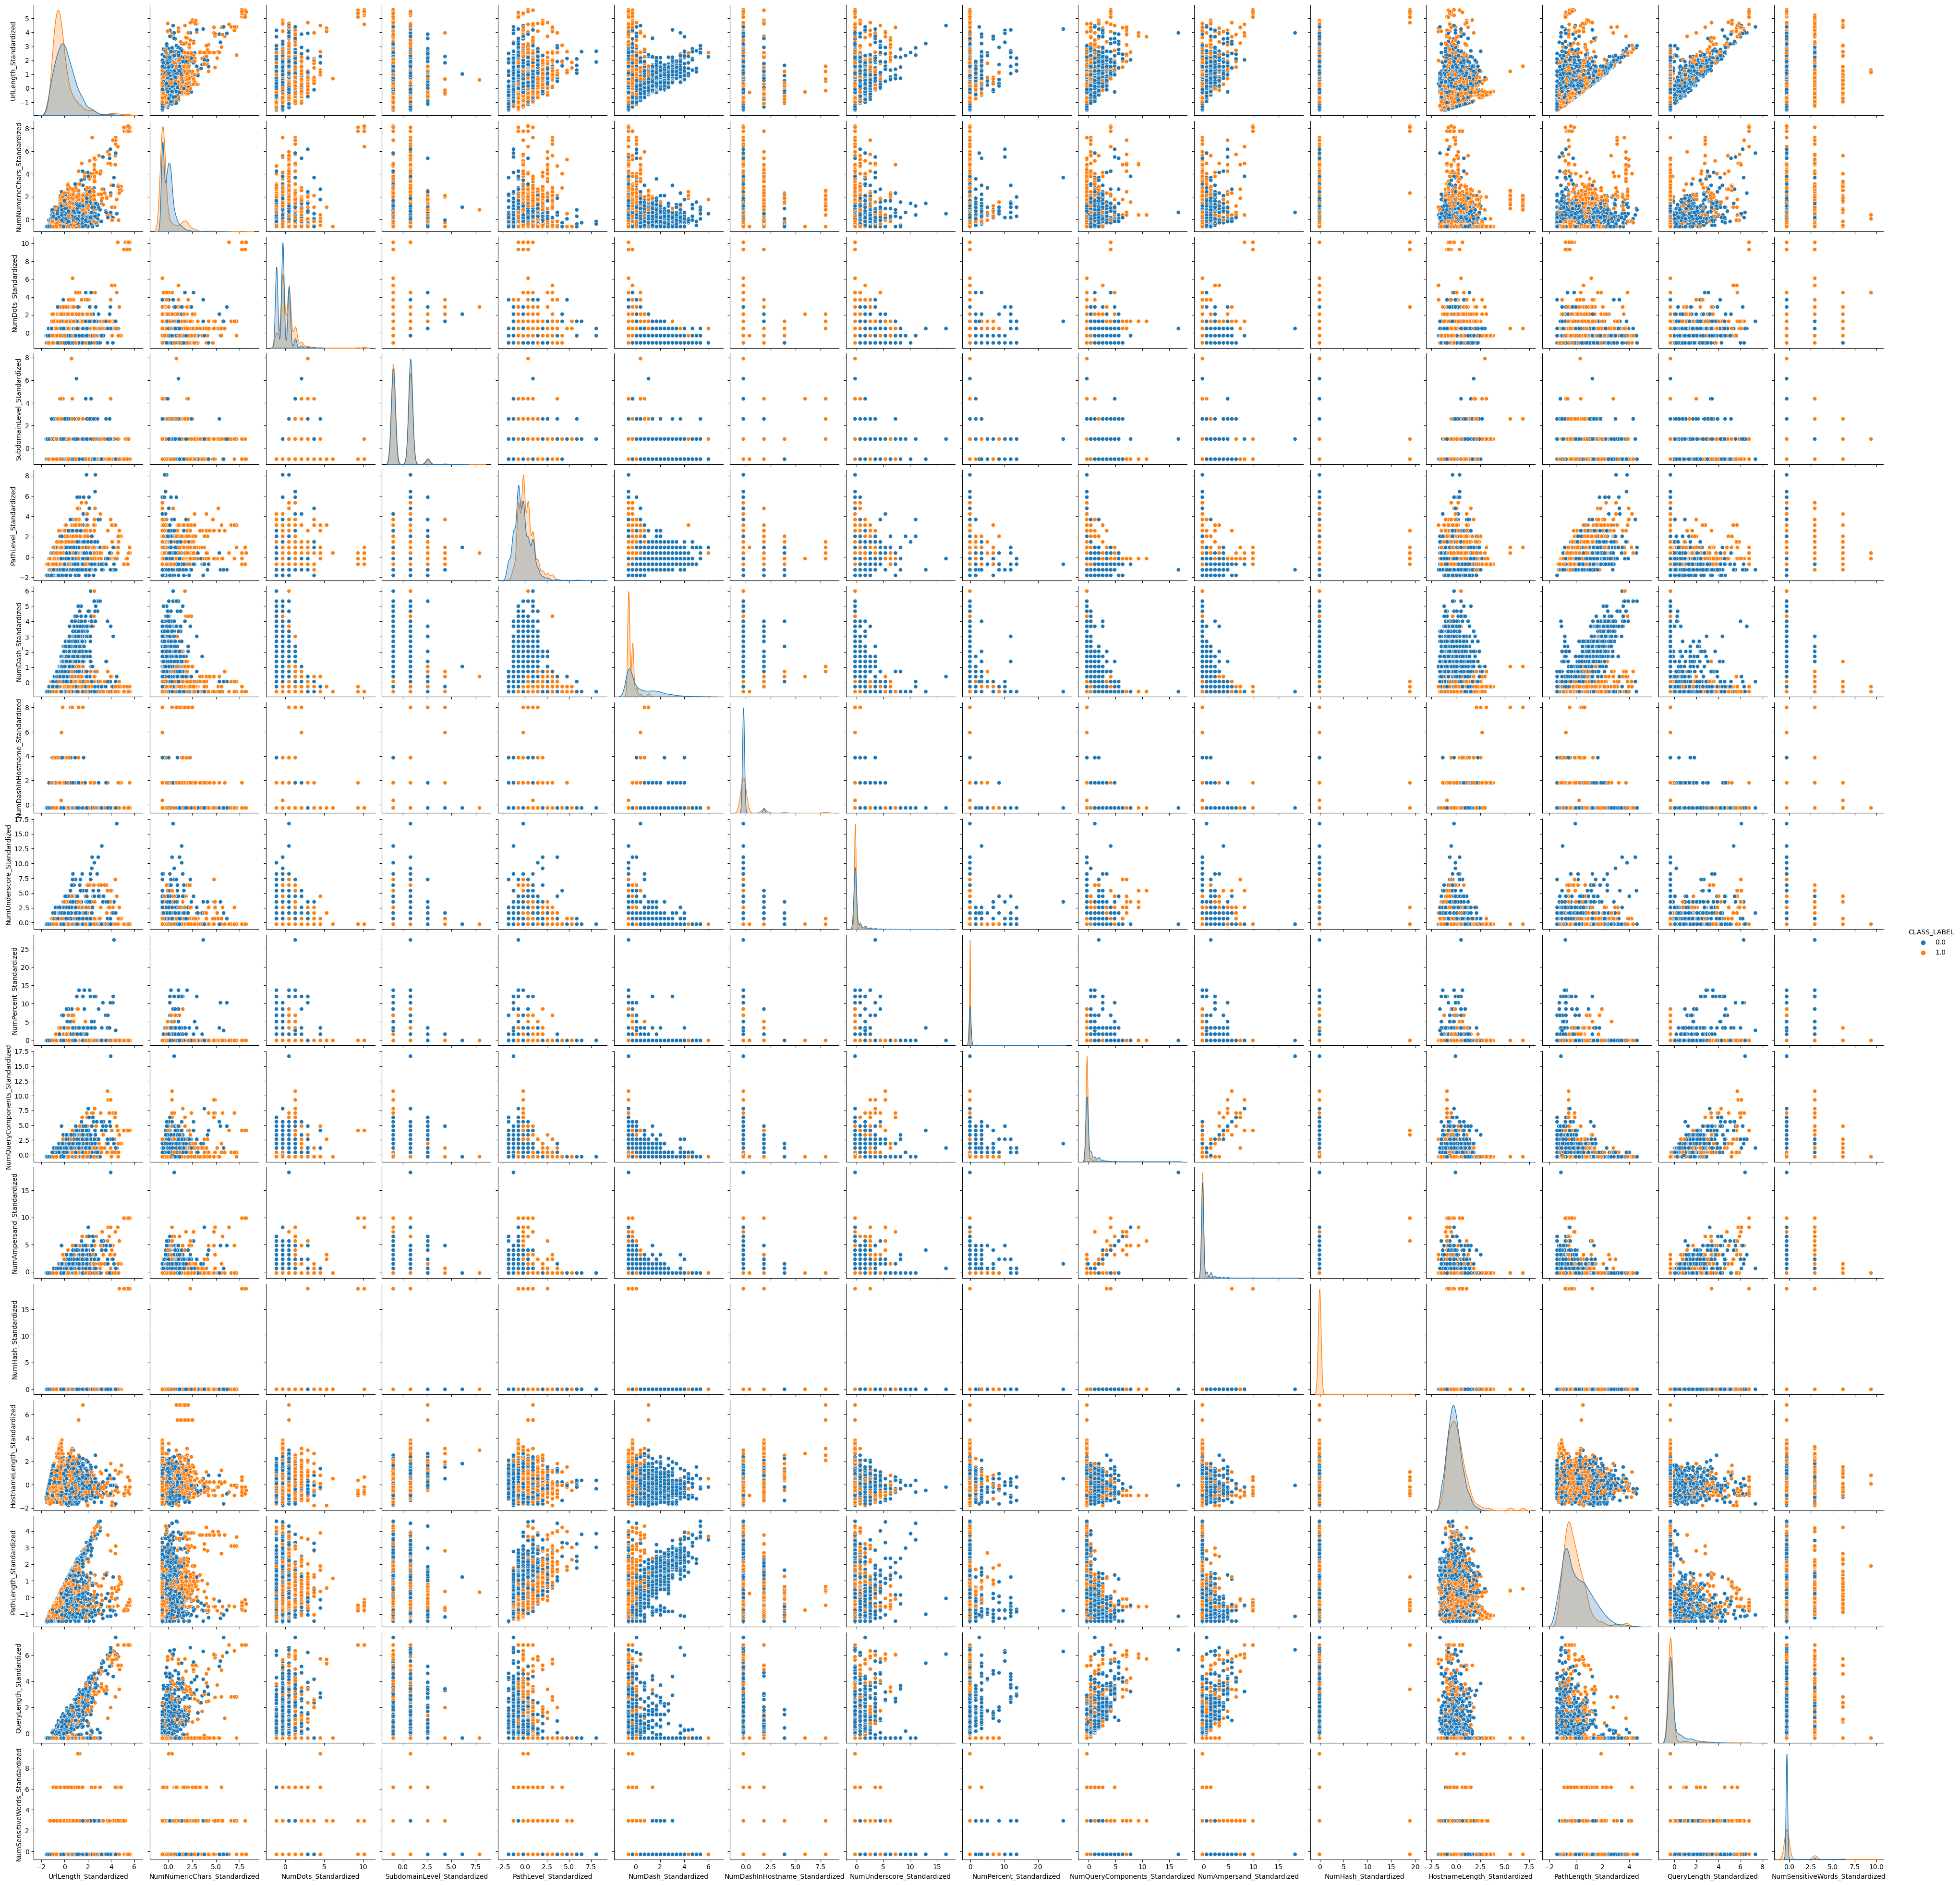

In [8]:
# dfClass_labels = target 
dfTrain2Numstd = dfTrain2Numstd.join(dfClass_labels) # Add 'CLASS_LABELS' to dfTrain2Numstd dataframe
sns.pairplot(dfTrain2Numstd,hue='CLASS_LABEL')

Results are hard to see for every feature, can break down the pairplot into smaller sections if needed. 
Results:
'NumDash_Standardized' & 'PathLength_Standardized' are influenced by target, should be included in model.


Break plot down to show better.
Plot shows: 'UrlLength','NumNumericChars','NumDots','SubdomainLevel', 'PathLevel' against target 'CLASS_LABEL'

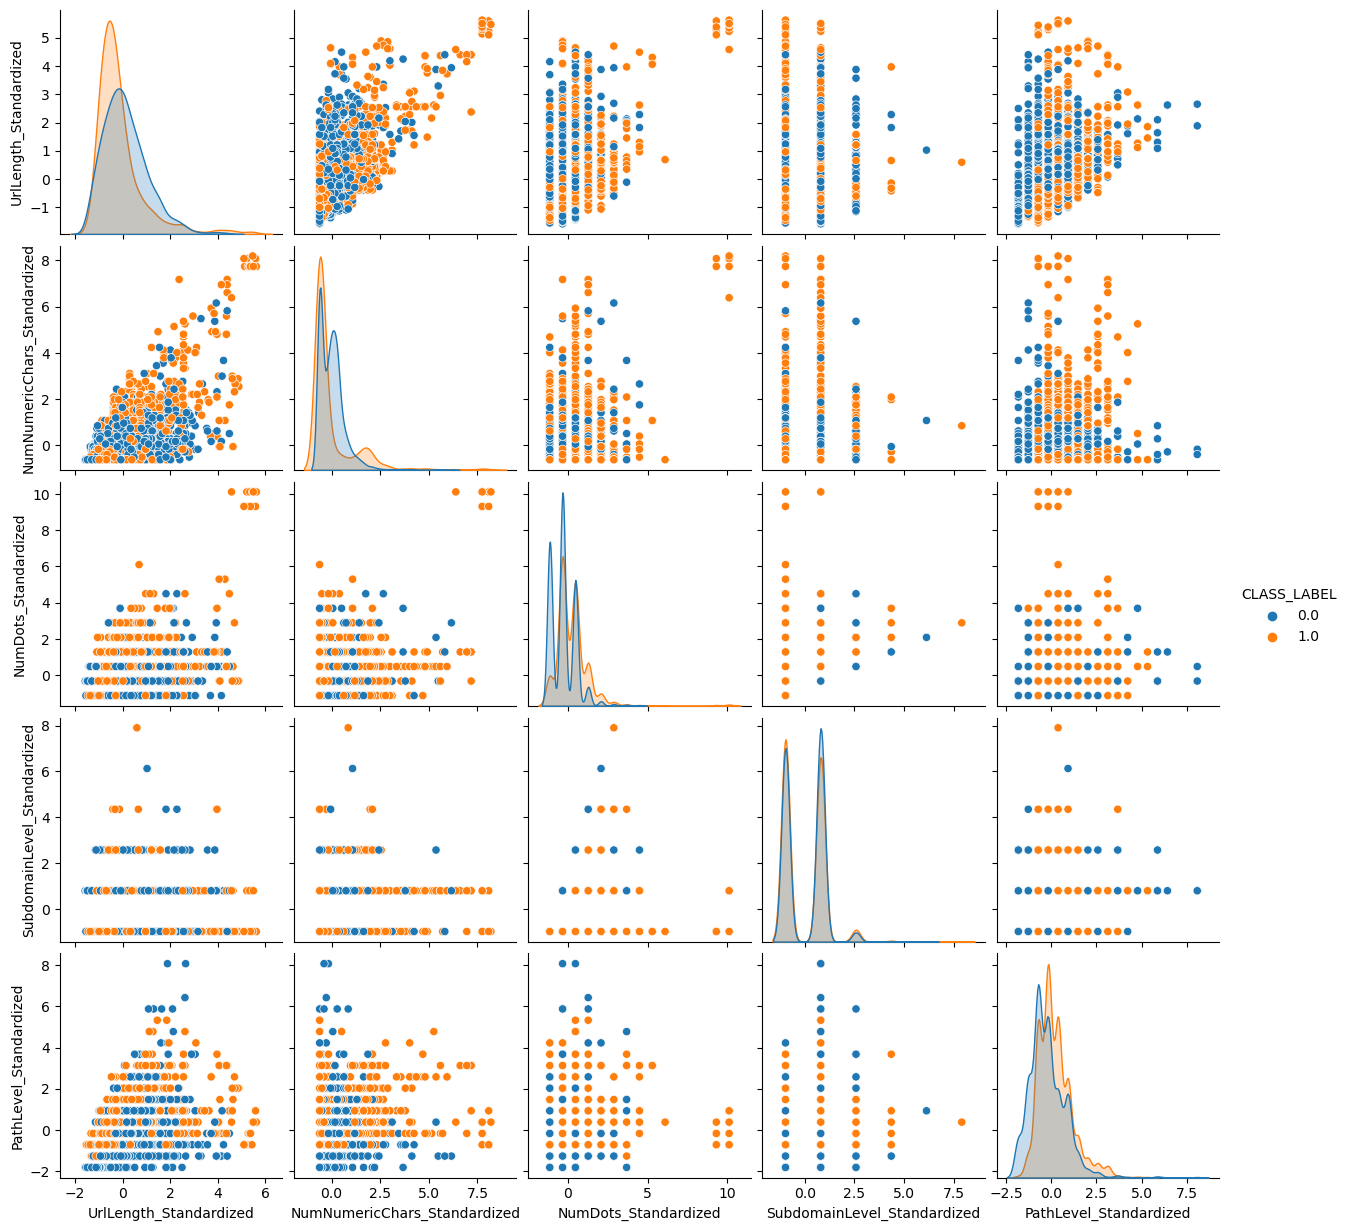

In [9]:
sns.pairplot(dfTrain2Numstd.iloc[:,[0,1,2,3,4,16]],hue='CLASS_LABEL')

Results:

Break plot down to show better.
Plot shows: 'NumDash','NumDashInHostname','NumUnderscore','NumPercent', 'NumQueryComponents' against target 'CLASS_LABEL'

Results that show influence on target:
'UrlLength_Standardized' & 'PathLevel_Standardized' & 'NumNumericChars'

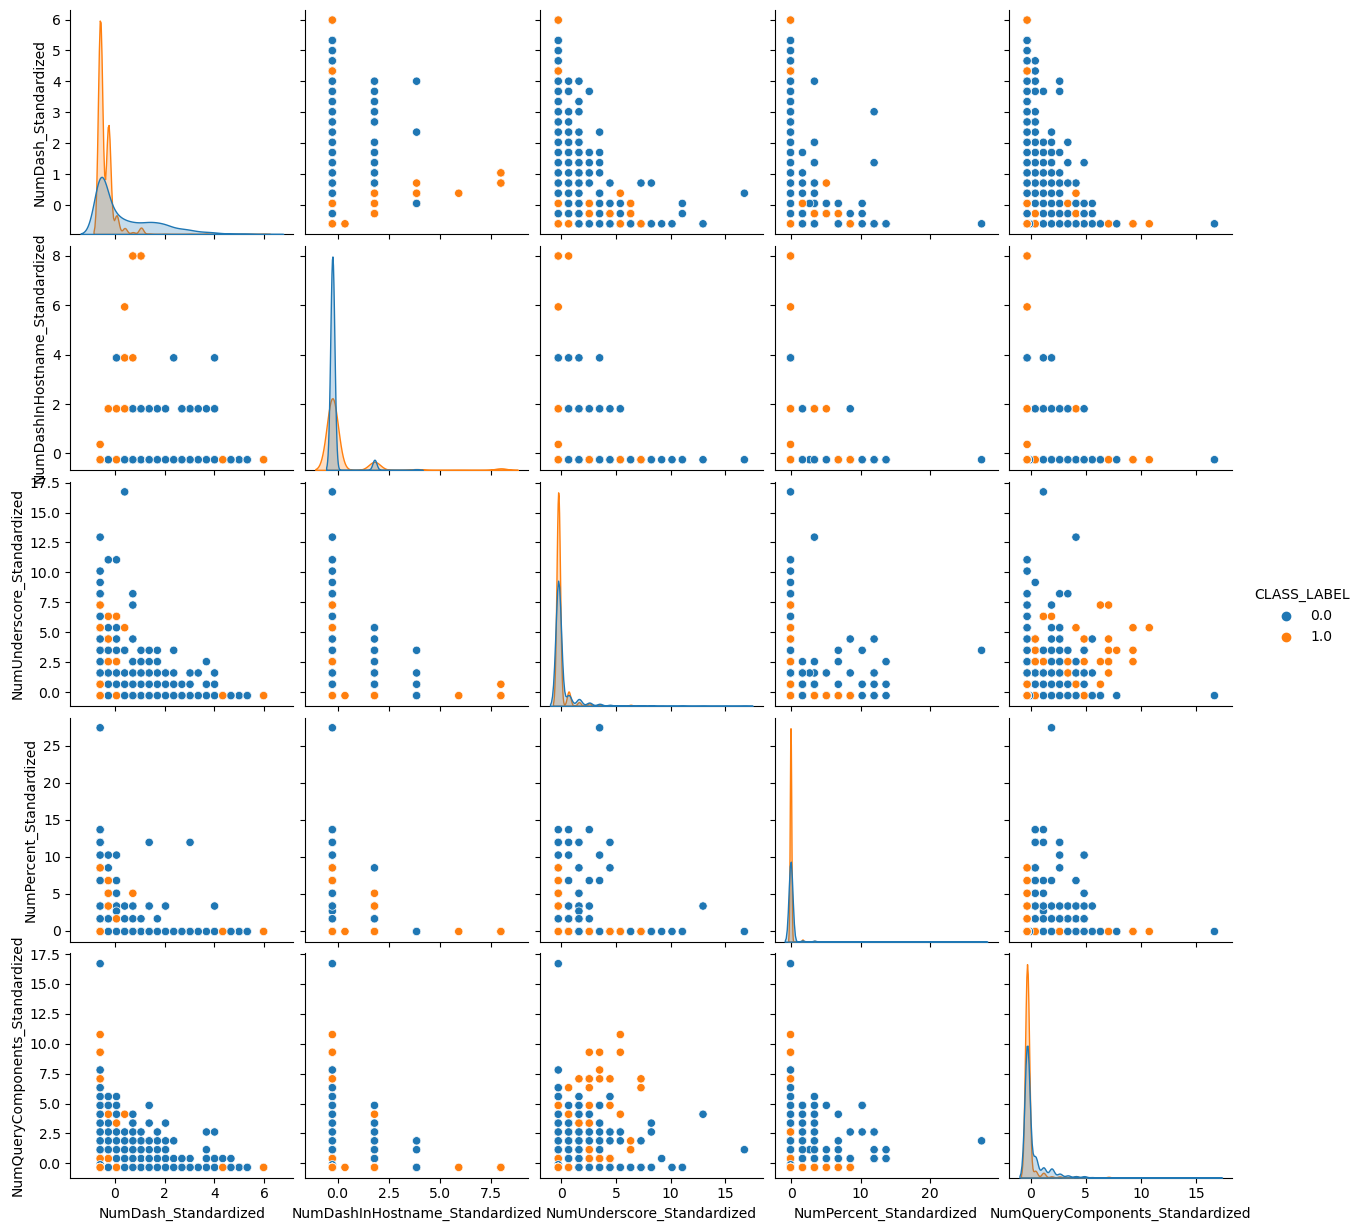

In [10]:
sns.pairplot(dfTrain2Numstd.iloc[:,[5,6,7,8,9,16]],hue='CLASS_LABEL')

Results: These features do not show a good, non-linear relationship with the target.

Break plot down to show better.
Plot shows: 'NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords' against target 'CLASS_LABEL'

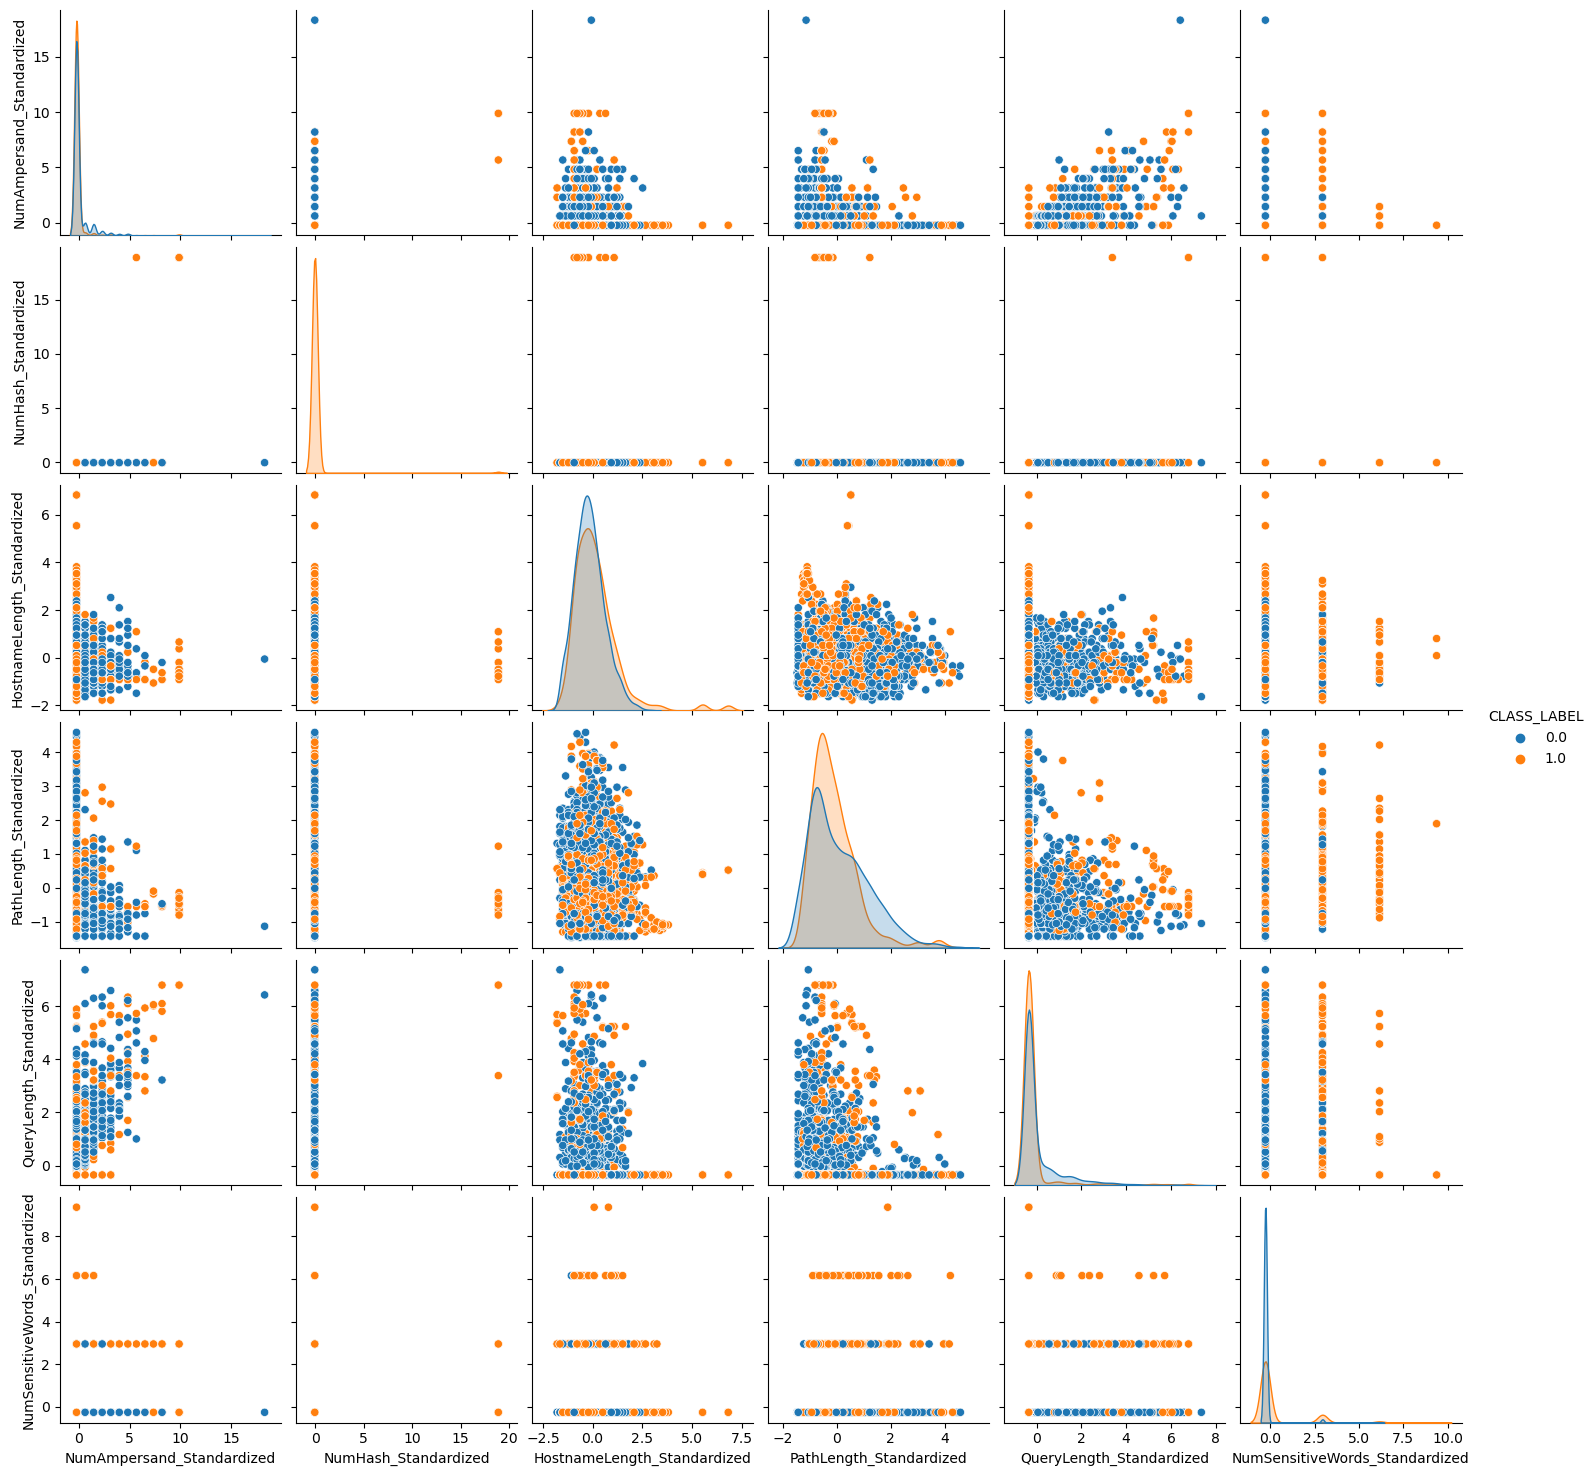

In [11]:
sns.pairplot(dfTrain2Numstd.iloc[:,[10,11,12,13,14,15,16]],hue='CLASS_LABEL')

Results: 
'PathLength_Standardized' show a different relationship based on 'CLASS_LABEL' and should be included in model.

## Feature Selection
### Numeric Feature Selection

#### Numeric Features that have influence on target 'CLASS_LABEL' from section above

1. 'NumDash_Standardized'
2. 'PathLength_Standardized'
3. 'UrlLength_Standardized'
4. 'PathLevel_Standardized'

#### Relationship between chosen numeric features on target 'CLASS_LABEL' in a pairplot

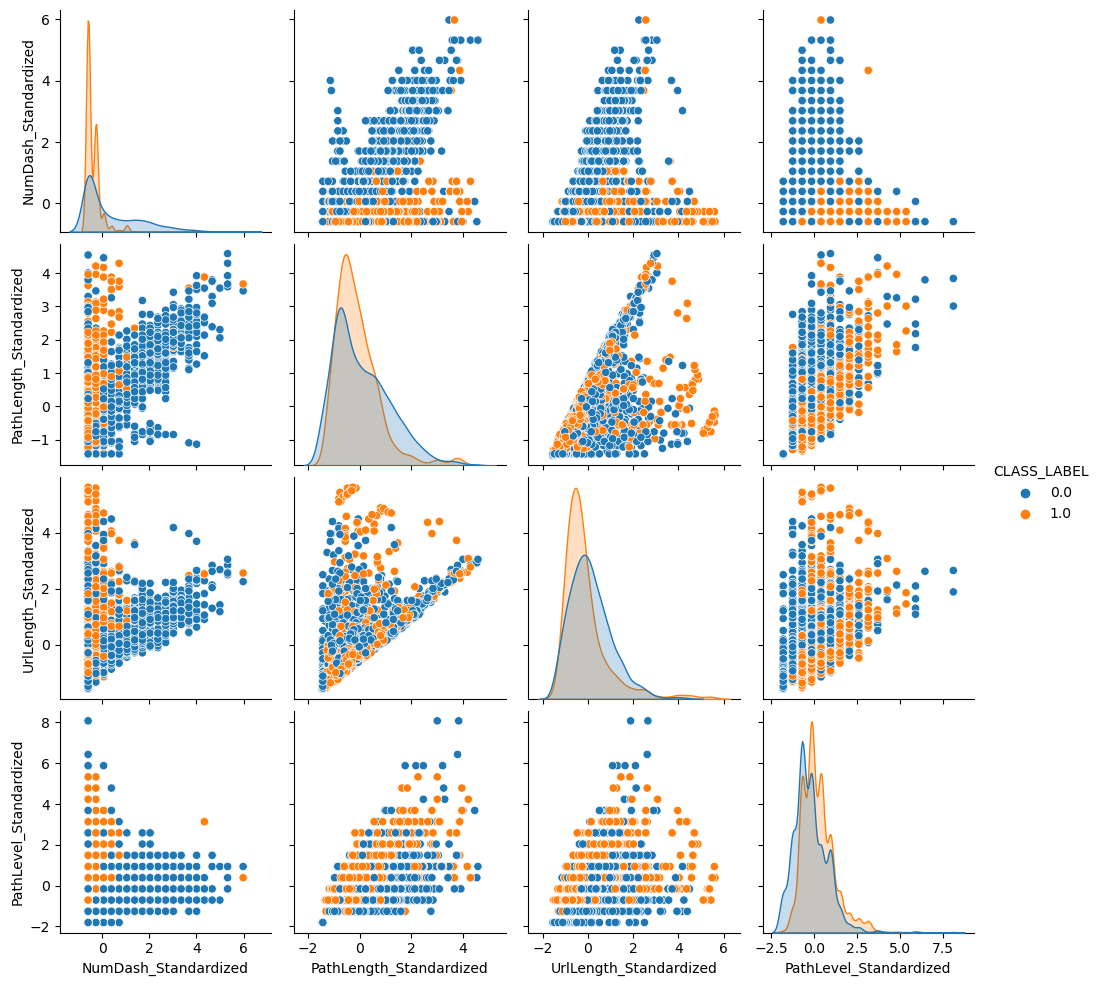

In [12]:
chosenNumeric = dfTrain3[['CLASS_LABEL','NumDash_Standardized','PathLength_Standardized','UrlLength_Standardized','PathLevel_Standardized']]
sns.pairplot(chosenNumeric,hue='CLASS_LABEL')

The non-linear relationship between the chosen numeric features can be seen in this piarplot. A decent separation between blue and orange is obvious on 'NumDash_Standardized' and 'PathLevel_Standardized' in particular. 

### Binary Feature Selection
#### Automated binary feature selection using RFE
SKlearn's recursive feature selection will select features by recursively considering smaller and smaller sets of features. It will output n bools depending on the chosen amount of features 'n_features_to_select'. 

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
columns_to_select=['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selector.fit(dfTrain3[columns_to_select], dfTrain3['CLASS_LABEL'])
print(rfe_selector.get_support())
dfTrain3[columns_to_select].columns[ rfe_selector.get_support() ]

[False False  True False  True False False False False False False  True
 False False False False False False False]


Index(['NoHttps', 'IpAddress', 'InsecureForms'], dtype='object')

Binary features to select:
1. 'NoHttps'
2. 'IpAddress'
3. 'InsecureForms'

Plot the features that were selected by the RFE to target 'CLASS_LABEL'

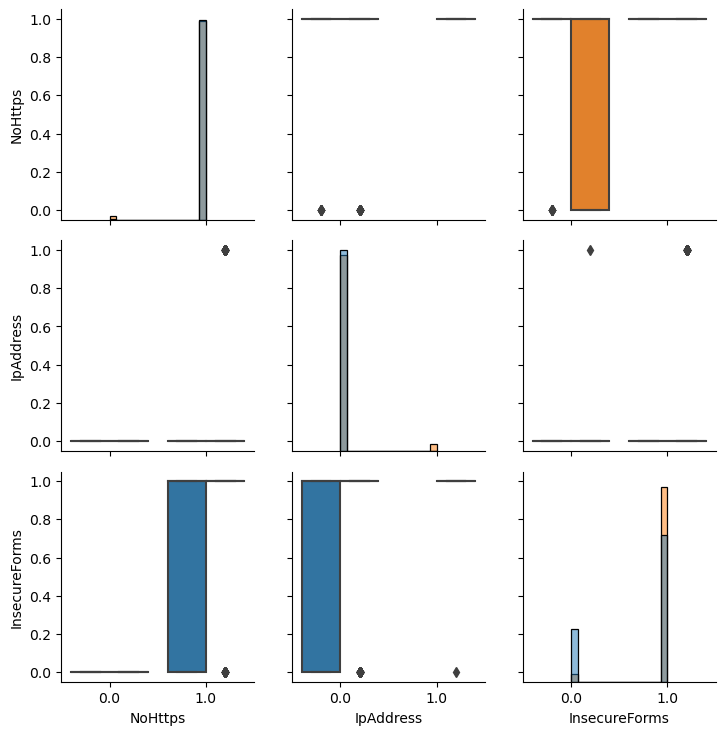

In [14]:
columns_to_plot=['NoHttps','IpAddress', 'InsecureForms','CLASS_LABEL']
g=sns.PairGrid(dfTrain3[columns_to_plot], hue='CLASS_LABEL')
g.map_diag(sns.histplot)
g.map_offdiag(sns.boxplot) 

#### Check Binary feature variability
Plot variability for features chosen by the RFE algorithm.
First, can show the variability in the target 'CLASS_LABEL' to see how the chosen features relate.

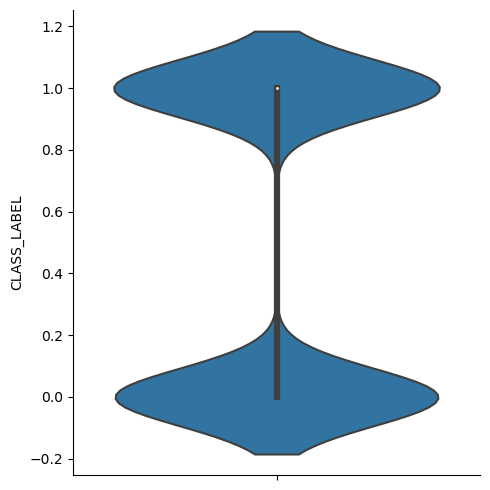

In [15]:
sns.catplot(y='CLASS_LABEL', kind='violin', log_scale=True, data=dfTrain3)

Results show that target 'CLASS_LABEL' is pretty well distributed between both '0' & '1'. Binary features that more closely resemble this distribution will produce a better model

Plot variability of 'InsecureForms'

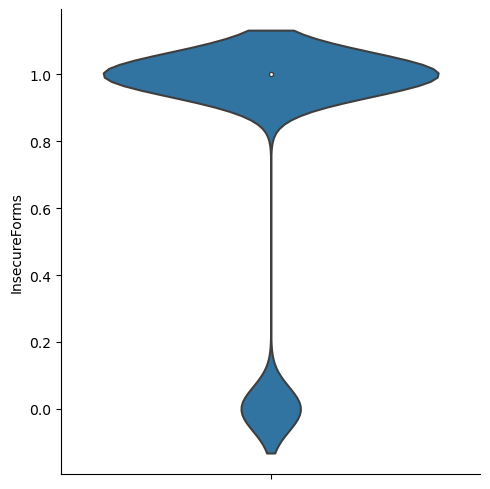

In [16]:
sns.catplot(y='InsecureForms', kind='violin', log_scale=True, data=dfTrain2Bin)

The variability plot of 'InsecureForms' is not perfectly alligned with the target but it isn't bad.

Next, show plot of 'IpAddress' distribution.

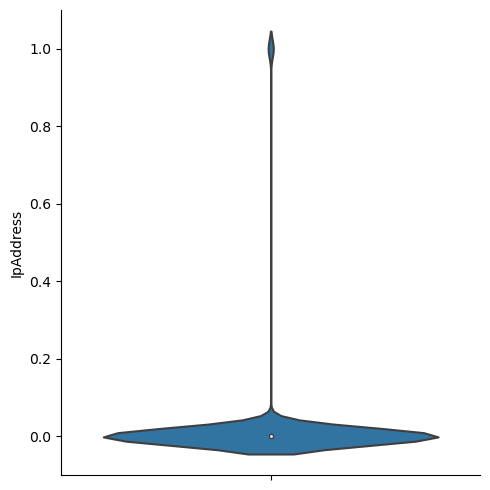

In [17]:
sns.catplot(y='IpAddress', kind='violin', log_scale=True, data=dfTrain2Bin)

This plot is NOT very promising for 'IpAddress' it shows that this feature does not have a distribution similar to the target 'CLASS_LABEL'. It should be replaced with another feature.

Replace 'IpAddress' with 'RandomString' and check for variability similar to target

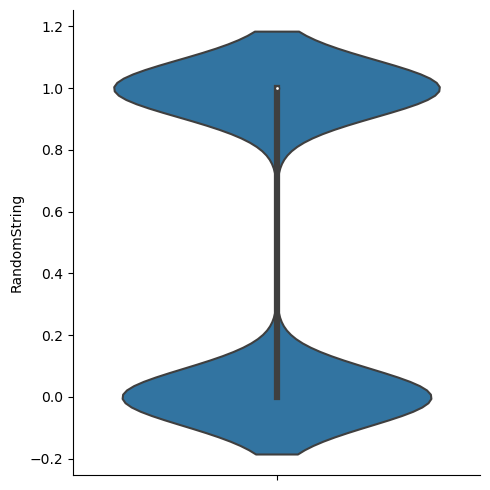

In [18]:
sns.catplot(y='RandomString', kind='violin', log_scale=True, data=dfTrain2Bin)

The distribution for 'RandomString' looks very promising, more like the target. 

Next, show distribution for 'NoHttps'

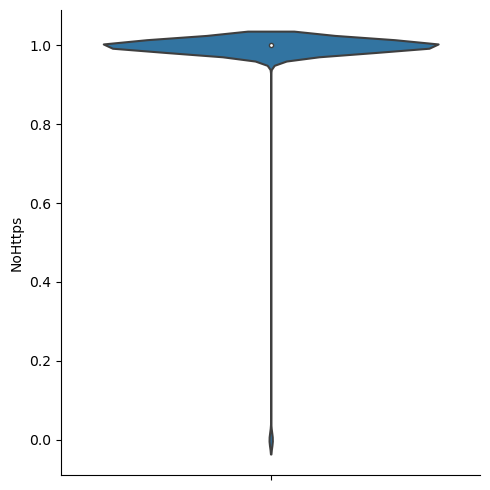

In [19]:
sns.catplot(y='NoHttps', kind='violin', log_scale=True, data=dfTrain2Bin)

As before, this plot looks nothing like the target distribution. Can try another feature instead. As it is unlikely that 'NoHttps' will help predicting target.

Next, plot distribution of 'DomainInPaths'

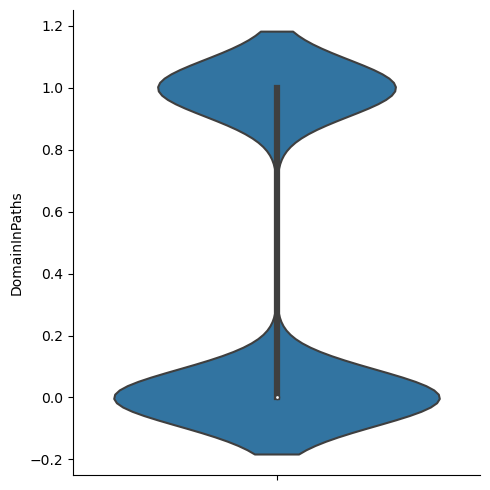

In [20]:
sns.catplot(y='DomainInPaths', kind='violin', log_scale=True, data=dfTrain2Bin)

This feature has a distribution that is much more similar to the target. Replace 'NoHttps' with 'DomainInPaths' for feature selection.

#### Binary Feature Selection:
1. 'DomainsInPaths'
2. 'RandomString'
3. 'InsecureForms'

### Final Feature Selection:
1. 'NumDash_Standardized'
2. 'PathLength_Standardized'
3. 'UrlLength_Standardized'
4. 'PathLevel_Standardized'
5. 'DomainsInPaths'
6. 'RandomString'
7. 'InsecureForms'